This project applies a β-Variational Autoencoder (β-VAE) to the ISCX VPN-nonVPN traffic dataset to learn compact and meaningful latent representations of network traffic flows. Instead of manually engineered features, the VAE automatically learns how to compress and reconstruct network data while preserving essential structure. The learned latent features are then visualized using t-SNE to explore class separability, and a downstream classifier is trained on these latent embeddings to predict traffic categories such as browsing, streaming, VoIP, and VPN types. Finally, classification performance on the learned latent space is compared against performance on the raw input features to evaluate how effectively the β-VAE captures discriminative information.

In [ ]:
from train import train
from utils import plot_loss, extract_latents, visualize_tsne, evaluate_classification
from config import *
import joblib

In [ ]:
# train model
model, train_history, (X_test, y_test, scaler, le, test_loader) = train()

Using device: cuda
Epoch 0/25: train_loss=0.008943, val_loss=0.002272
Epoch 1/25: train_loss=0.002351, val_loss=0.002243
Epoch 2/25: train_loss=0.002280, val_loss=0.002137
Epoch 3/25: train_loss=0.002209, val_loss=0.002118
Epoch 4/25: train_loss=0.002197, val_loss=0.002107
Epoch 5/25: train_loss=0.002187, val_loss=0.002105
Epoch 6/25: train_loss=0.002183, val_loss=0.002103
Epoch 7/25: train_loss=0.002176, val_loss=0.002094
Epoch 8/25: train_loss=0.002146, val_loss=0.002061
Epoch 9/25: train_loss=0.002133, val_loss=0.002051
Epoch 10/25: train_loss=0.002127, val_loss=0.002048
Epoch 11/25: train_loss=0.002126, val_loss=0.002050
Epoch 12/25: train_loss=0.002121, val_loss=0.002049
Epoch 13/25: train_loss=0.002122, val_loss=0.002047
Epoch 14/25: train_loss=0.002119, val_loss=0.002040
Epoch 15/25: train_loss=0.002115, val_loss=0.002042
Epoch 16/25: train_loss=0.002105, val_loss=0.002031
Epoch 17/25: train_loss=0.002103, val_loss=0.002033
Epoch 18/25: train_loss=0.002101, val_loss=0.002025
Epo

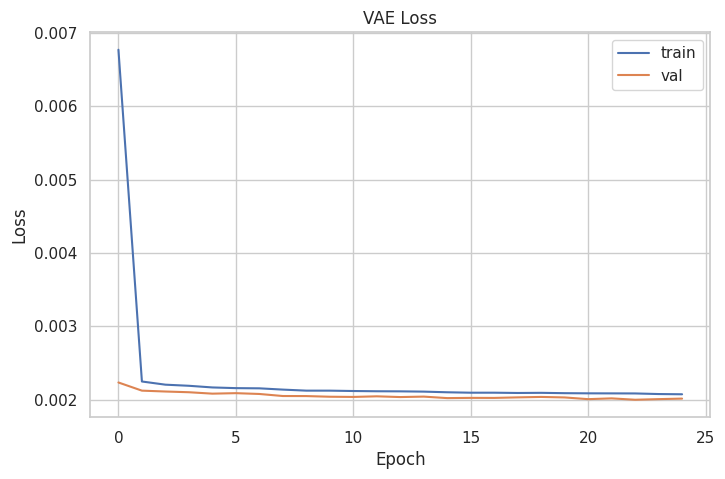

In [ ]:
# Plotting the training loss
plot_loss(loss_history)

Latent shapes: (50750, 32) (8956, 32)


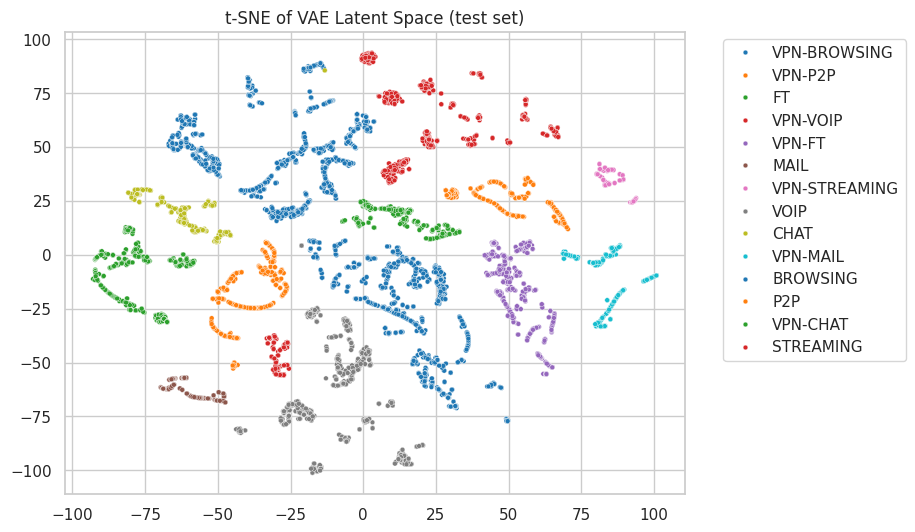

In [ ]:
# Plot t-SNE Laten Space
zs_test, ys_test = extract_latents(model, test_loader, DEVICE)
visualize_tsne(zs_test, ys_test, le)

In [ ]:
zs_train, ys_train = extract_latents(model, train_loader, DEVICE)
print("Classification on Latent Features")
evaluate_classification(zs_train, ys_train, zs_test, ys_test, le)


RandomForest on Latents
               precision    recall  f1-score   support

     BROWSING       1.00      1.00      1.00      1500
         CHAT       1.00      1.00      1.00       376
           FT       1.00      1.00      1.00       596
         MAIL       1.00      1.00      1.00       205
          P2P       1.00      1.00      1.00       600
    STREAMING       1.00      1.00      1.00       192
         VOIP       1.00      1.00      1.00       973
 VPN-BROWSING       1.00      1.00      1.00      1500
     VPN-CHAT       1.00      1.00      1.00       426
       VPN-FT       1.00      1.00      1.00       706
     VPN-MAIL       1.00      1.00      1.00       367
      VPN-P2P       1.00      1.00      1.00       512
VPN-STREAMING       1.00      1.00      1.00       167
     VPN-VOIP       1.00      1.00      1.00       836

     accuracy                           1.00      8956
    macro avg       1.00      1.00      1.00      8956
 weighted avg       1.00      1.00     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("RandomForest on Raw Features")
evaluate_on_raw(X_train, y_train, X_test, y_test, le)

RandomForest on Raw Features
               precision    recall  f1-score   support

     BROWSING       0.84      0.89      0.86      1500
         CHAT       0.74      0.68      0.71       376
           FT       0.90      0.67      0.77       596
         MAIL       0.88      0.66      0.75       205
          P2P       0.89      0.95      0.92       600
    STREAMING       0.92      0.64      0.75       192
         VOIP       0.99      0.96      0.97       973
 VPN-BROWSING       0.78      0.88      0.83      1500
     VPN-CHAT       0.72      0.56      0.63       426
       VPN-FT       0.82      0.77      0.79       706
     VPN-MAIL       0.81      0.87      0.84       367
      VPN-P2P       0.67      0.84      0.74       512
VPN-STREAMING       0.92      0.95      0.93       167
     VPN-VOIP       0.95      0.92      0.93       836

     accuracy                           0.84      8956
    macro avg       0.84      0.80      0.82      8956
 weighted avg       0.84      0.84